# **PROJECT OVERVIEW**

> **Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:** 

# **QUESTION**
* **Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.*

# **METRIC OF SUCCESS**

> 




# **TOOLBOX** 

### **Libraries*

In [ ]:
# Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

# regression and classiffier models
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import plot_tree


# Decision Trees and Random Forest
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
# Tree visualizations
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus


# SVM
# Import Suport Vector Classifier module from svm library. We'll use SVC to model our data
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import train_test_split
# Import scikit-learn metrics module for accuracy calculation
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

### **Helper functions*

In [ ]:
# check percentage of null values on each column
def perc_missing(data):
  # tot sum of missing values
  sum_missing = data.isnull().sum().sort_values(ascending=False)

  #percentage of the total
  perc_total = (data.isnull().sum() / len(data)).sort_values(ascending=True)

  missing_values = pd.DataFrame(
      {
          "TOTAL MISSING": sum_missing,
          "PERCANTAGE":perc_total
      }
  )

  return missing_values

In [ ]:
# Removes outliers in particular columns
def remove_Outlier(Df,col_name):
  q1 = Df[col_name].quantile(0.25)
  q3 = Df[col_name].quantile(0.75)
  iqr = q3-q1 #Interquartile range
  lower_bound  = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  
  df_out = Df.loc[(Df[col_name] > lower_bound) & (Df[col_name] < upper_bound)]
 
  return df_out

# **Exploratory Data Analysis and Documentation**

* **TODO*

> **The student exhaustively applies the exploratory data analysis approaches while defining the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question. The students find and deal with outliers, anomalies, and missing data within the dataset. More on, they interpret and challenge the solution by providing insights on why and how they can make improvements. Also, the documentation is well written and clearly explains what the code is accomplishing and how. A comprehensive conclusion is well articulated based on the findings.**



## Data Understanding and Cleaning

>find and deal with outliers, anomalies, and missing data within the dataset

In [ ]:
main_data = pd.read_csv("hypothyroid.csv")

In [ ]:
main_data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.60,y,1.02,y,7.50,n,?


In [ ]:
# shape/size
print("Main Data Shape: ", main_data.shape) 

Main Data Shape:  (3163, 26)


In [ ]:
# check the column names
data_col = [i for i in main_data.columns.tolist()]

data_col

['status',
 'age',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'TSH',
 'T3_measured',
 'T3',
 'TT4_measured',
 'TT4',
 'T4U_measured',
 'T4U',
 'FTI_measured',
 'FTI',
 'TBG_measured',
 'TBG']

In [ ]:
# check the data types
main_data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# Get a description of 
main_data.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [ ]:
# Check missing values
perc_missing(main_data)

,TOTAL MISSING,PERCANTAGE
FTI,0,0.0
FTI_measured,0,0.0
T3,0,0.0
T3_measured,0,0.0
T4U,0,0.0
T4U_measured,0,0.0
TBG,0,0.0
TBG_measured,0,0.0
TSH,0,0.0
TSH_measured,0,0.0


In [ ]:
# Count number of unique values
# main_data.nunique(axis = 0)

# unique values in each columns
for x in main_data.columns:
    #prinfting unique values
    print(x ,':', len(main_data[x].unique()))

status : 2
age : 93
sex : 3
on_thyroxine : 2
query_on_thyroxine : 2
on_antithyroid_medication : 2
thyroid_surgery : 2
query_hypothyroid : 2
query_hyperthyroid : 2
pregnant : 2
sick : 2
tumor : 2
lithium : 2
goitre : 2
TSH_measured : 2
TSH : 240
T3_measured : 2
T3 : 70
TT4_measured : 2
TT4 : 269
T4U_measured : 2
T4U : 159
FTI_measured : 2
FTI : 281
TBG_measured : 2
TBG : 53


In [ ]:
# Since our data has "?" to represent missing values
# we shall replace them with numpy null values 
# then later on drop those values from our data sets
# new_cpy = main_data.copy()
for (columnName, columnData) in main_data.iteritems():
  main_data[columnName] = main_data[columnName].replace(['?'], np.NAN)

In [ ]:
main_data.head(10)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,NaN
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.70,y,1.30,y,54,y,0.86,y,63,n,NaN
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.90,y,34,y,1.05,y,32,n,NaN
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,NaN,y,39,y,1.21,y,32,n,NaN
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,NaN,y,7.60,y,1.02,y,7.50,n,NaN


## Encoding our Data

In [ ]:
df_to_label = main_data.copy()

In [ ]:
df_to_label.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,NaN
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,NaN
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,NaN
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,NaN
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,NaN


In [ ]:
cls_to_lbl = [
 'status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured',
]
df_labeled = pd.get_dummies(df_to_label, columns = cls_to_lbl, drop_first=True)

In [ ]:
# Drop a column
#drop one column by name
df_labeled.drop('TBG', axis=1, inplace=True)

In [ ]:
df_labeled.head()

,age,TSH,T3,TT4,T4U,FTI,status_negative,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,72,30,0.60,15,1.48,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,15,145,1.70,19,1.13,17,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24,0,0.20,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,24,430,0.40,6,1.04,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77,7.30,1.20,57,1.28,44,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


In [ ]:
# Check missing
perc_missing(df_labeled)

,TOTAL MISSING,PERCANTAGE
FTI,247,0.078090
FTI_measured_y,0,0.000000
T3,695,0.219728
T3_measured_y,0,0.000000
T4U,248,0.078407
T4U_measured_y,0,0.000000
TBG_measured_y,0,0.000000
TSH,468,0.147961
TSH_measured_y,0,0.000000
TT4,249,0.078723


In [ ]:
# Check description
df_labeled.dtypes

age                            object
TSH                            object
T3                             object
TT4                            object
T4U                            object
FTI                            object
status_negative                 uint8
sex_M                           uint8
on_thyroxine_t                  uint8
query_on_thyroxine_t            uint8
on_antithyroid_medication_t     uint8
thyroid_surgery_t               uint8
query_hypothyroid_t             uint8
query_hyperthyroid_t            uint8
pregnant_t                      uint8
sick_t                          uint8
tumor_t                         uint8
lithium_t                       uint8
goitre_t                        uint8
TSH_measured_y                  uint8
T3_measured_y                   uint8
TT4_measured_y                  uint8
T4U_measured_y                  uint8
FTI_measured_y                  uint8
TBG_measured_y                  uint8
dtype: object

In [ ]:
df_labeled.columns.tolist()

['age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'status_negative',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']

In [ ]:
# Convert data types to int and float

#replace all NaN values with zeros
df_labeled = df_labeled.fillna(0)

col_to_float = [ 'TSH','T3','TT4','T4U',]
col_to_int = [
 'age',
 'status_negative',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']
 
for col in col_to_float :
    df_labeled[col] = df_labeled[col].astype(float)

for col in col_to_int:
    df_labeled[col] = df_labeled[col].astype(int)

In [ ]:
df_labeled.dtypes

age                              int64
TSH                            float64
T3                             float64
TT4                            float64
T4U                            float64
FTI                             object
status_negative                  int64
sex_M                            int64
on_thyroxine_t                   int64
query_on_thyroxine_t             int64
on_antithyroid_medication_t      int64
thyroid_surgery_t                int64
query_hypothyroid_t              int64
query_hyperthyroid_t             int64
pregnant_t                       int64
sick_t                           int64
tumor_t                          int64
lithium_t                        int64
goitre_t                         int64
TSH_measured_y                   int64
T3_measured_y                    int64
TT4_measured_y                   int64
T4U_measured_y                   int64
FTI_measured_y                   int64
TBG_measured_y                   int64
dtype: object

In [ ]:
df_labeled.describe()

,age,TSH,T3,TT4,T4U,status_negative,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,43.941195,5.046782,1.513531,100.281031,0.901502,0.952261,0.287069,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,0.780272,0.921277,0.921593,0.921910,0.082200
std,25.235169,22.160083,1.191836,52.588757,0.341286,0.213248,0.452466,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,0.414128,0.269348,0.268853,0.268356,0.274713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.500000,76.000000,0.820000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,48.000000,0.400000,1.600000,100.000000,0.940000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,64.000000,1.800000,2.200000,124.000000,1.050000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
lbl_col = [i for i in df_labeled.columns.tolist()]

lbl_col

['age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'status_negative',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']

In [ ]:
# check duplicated 
df_labeled.duplicated().sum()

156

In [ ]:
# Remove duplicates
df_labeled.drop_duplicates(inplace=True)

In [ ]:
# check duplicated 
df_labeled.duplicated().sum()

0

In [ ]:
perc_missing(df_labeled)

,TOTAL MISSING,PERCANTAGE
FTI,0,0.0
FTI_measured_y,0,0.0
T3,0,0.0
T3_measured_y,0,0.0
T4U,0,0.0
T4U_measured_y,0,0.0
TBG_measured_y,0,0.0
TSH,0,0.0
TSH_measured_y,0,0.0
TT4,0,0.0


## Univariate Analysis


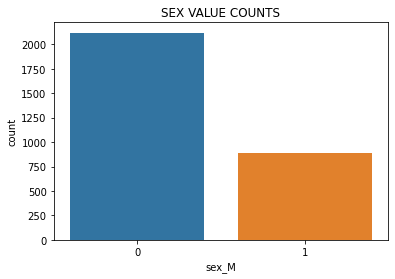

In [ ]:
# A count plot on Sex
# count plot on single categorical variable
sns.countplot(x ='sex_M', data = df_labeled)

# Show the plot
plt.title("SEX VALUE COUNTS")
plt.show()

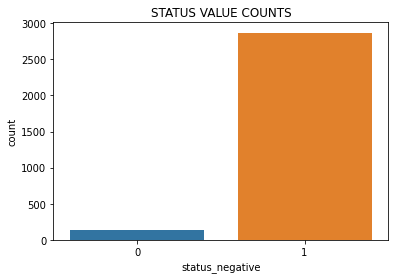

In [ ]:
# A count plot on status
# count plot on single categorical variable
sns.countplot(x ='status_negative', data = df_labeled)

plt.title("STATUS VALUE COUNTS")
# Show the plot
plt.show()

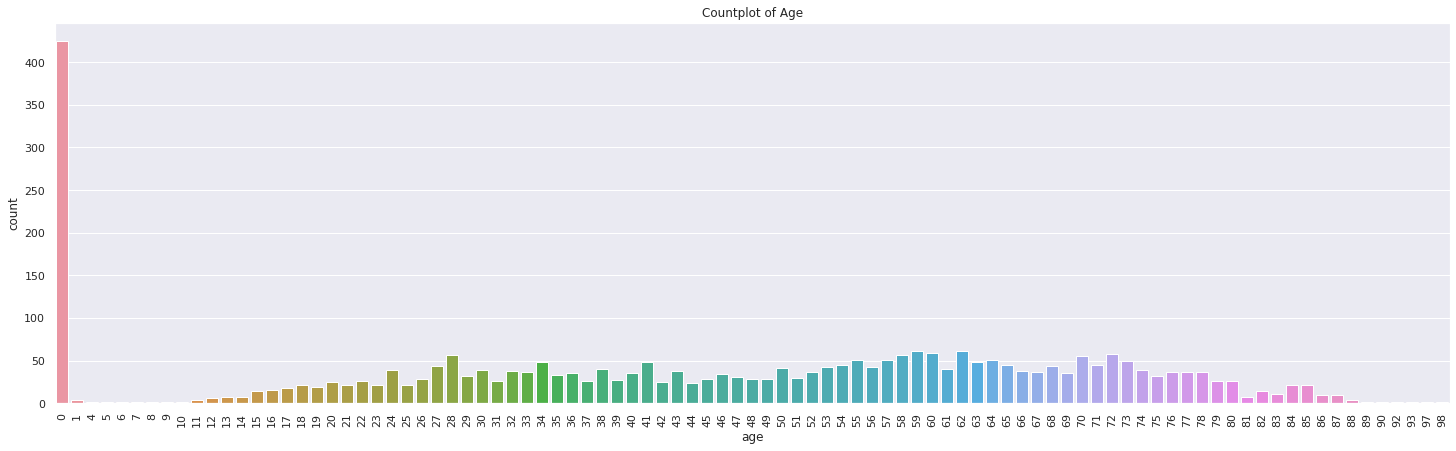

In [ ]:
# Visualiza age
sns.set_theme(style="darkgrid")
plt.figure(figsize=(25,7))
ax = sns.countplot(x='age', data=df_labeled)
plt.xticks(rotation=90)
ax = plt.title("Countplot of Age")

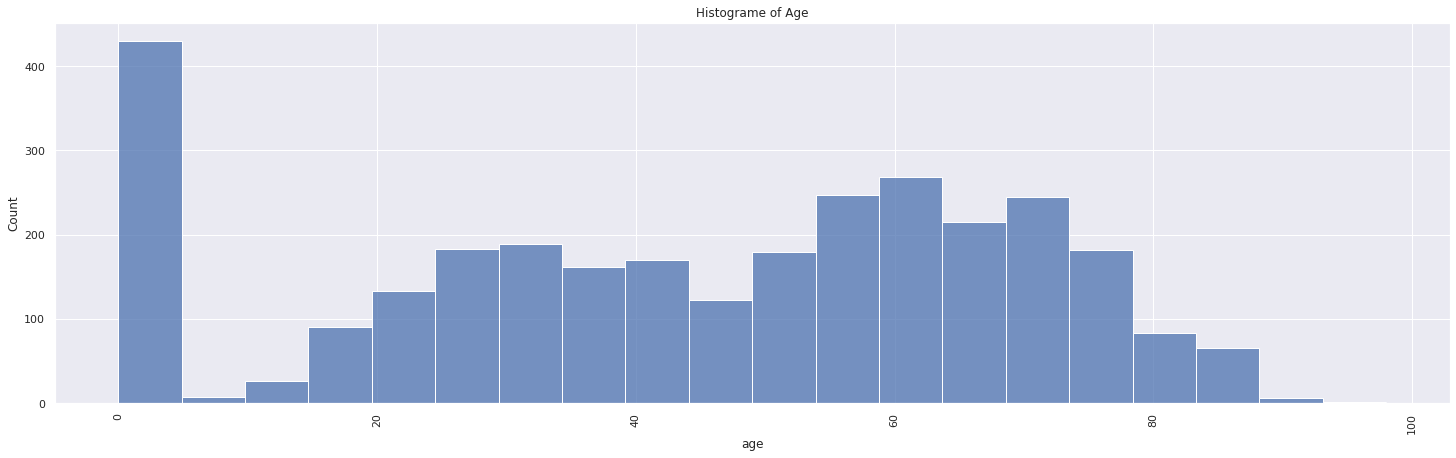

In [ ]:
# Visualiza age
sns.set_theme(style="darkgrid")
plt.figure(figsize=(25,7))
ax = sns.histplot(x='age', data=df_labeled)
plt.xticks(rotation=90)
ax = plt.title("Histograme of Age")

## Multivariate Analysis

In [ ]:
# Data description
df_labeled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3007.0,44.120053,25.291459,0.0,27.00,48.00,64.00,98.00
TSH,3007.0,5.082913,22.552606,0.0,0.00,0.40,1.80,530.00
T3,3007.0,1.547190,1.168645,0.0,0.70,1.60,2.20,10.20
TT4,3007.0,102.886565,49.821916,0.0,79.00,101.00,125.00,450.00
T4U,3007.0,0.925544,0.310529,0.0,0.83,0.95,1.06,2.21
status_negative,3007.0,0.953109,0.211440,0.0,1.00,1.00,1.00,1.00
sex_M,3007.0,0.295643,0.456407,0.0,0.00,0.00,1.00,1.00
on_thyroxine_t,3007.0,0.148321,0.355477,0.0,0.00,0.00,0.00,1.00
query_on_thyroxine_t,3007.0,0.018291,0.134023,0.0,0.00,0.00,0.00,1.00
on_antithyroid_medication_t,3007.0,0.013967,0.117375,0.0,0.00,0.00,0.00,1.00


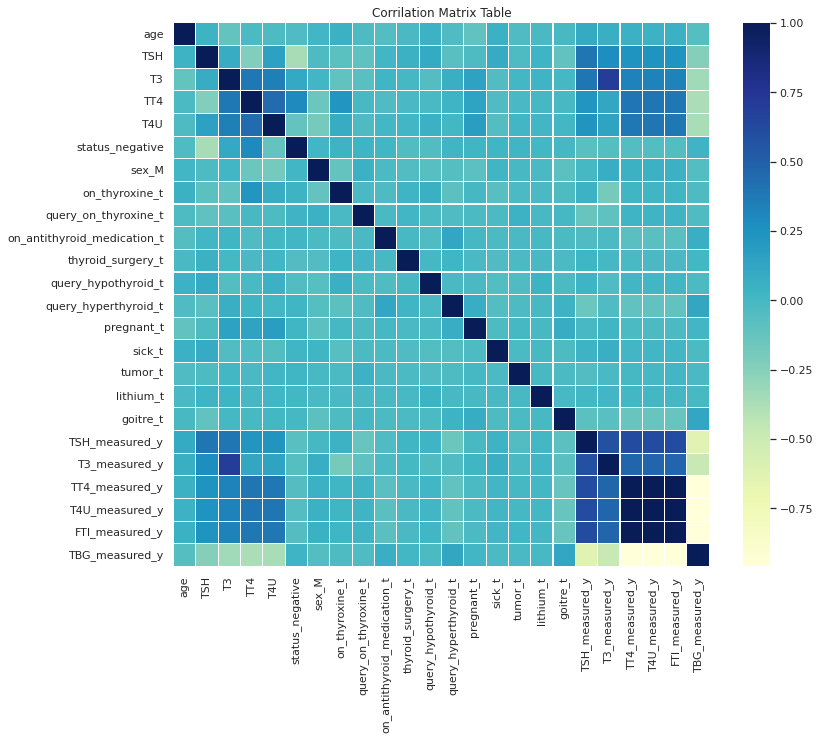

In [ ]:
# Correlation matrix
corrmat = df_labeled.corr(method='spearman')
f, ax = plt.subplots(figsize=(12, 10))
plt.title("Corrilation Matrix Table")
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

### Observations and Conclusions

* Age columns is fairly normaly distribution
* Due to some data errors we had to fill "?" will null values that we later ended up dropping.
* Did some data conversion to some of our labeled columns

# **Split our Data**

In [ ]:
# Copy of data for decision tree analysis
df_dct = df_labeled.copy()

In [ ]:
df_dct.head(10)

,age,TSH,T3,TT4,T4U,FTI,status_negative,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,72,30.0,0.6,15.0,1.48,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,15,145.0,1.7,19.0,1.13,17,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24,0.0,0.2,4.0,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,24,430.0,0.4,6.0,1.04,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77,7.3,1.2,57.0,1.28,44,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
5,85,138.0,1.1,27.0,1.19,23,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0
6,64,7.7,1.3,54.0,0.86,63,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0
7,72,21.0,1.9,34.0,1.05,32,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
8,20,92.0,0.0,39.0,1.21,32,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0
9,42,48.0,0.0,7.6,1.02,7.50,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0


In [ ]:
lbl_col

['age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'status_negative',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y']

In [ ]:
test_features = [
 'age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_M',
 'on_thyroxine_t',
 'query_on_thyroxine_t',
 'on_antithyroid_medication_t',
 'thyroid_surgery_t',
 'query_hypothyroid_t',
 'query_hyperthyroid_t',
 'pregnant_t',
 'sick_t',
 'tumor_t',
 'lithium_t',
 'goitre_t',
 'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y'      
]

X_dct = df_dct[test_features].values

y_dct = df_dct['status_negative'].values 

print(X_dct.shape)
print(y_dct.shape)

(3007, 24)
(3007,)


In [ ]:
# Train using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X_dct, y_dct, test_size=0.3, random_state=0)

# **Decision Trees**




In [ ]:
# A class to classify and regress then output answer
class reg_and_clsf:
  def __init__(self,X,X_train, X_test, y_train, y_test):
    self.X = X
    self.X_train = X_train
    self.X_test = X_test
    self.y_train = y_train
    self.y_test = y_test
  
  def clasy_ada(self):
    # # Create a decision tree classifier
    tree = DecisionTreeClassifier(max_depth=4)

    # Ada boost instance
    ada = AdaBoostRegressor(random_state=96,base_estimator=RandomForestRegressor(random_state=101),n_estimators=100,learning_rate=0.01)

    # train model
    ada.fit(self.X_train,self.y_train)
    
    # get score on training data
    score_train = ada.score(self.X_train,self.y_train)
    
    # get score on test data
    score_test = ada.score(self.X_test,self.y_test)

    test = pd.DataFrame({
        "Train_Score":[score_train],
        "Test_Score":[score_test],
    })

    return test
  
  def classy_rand_frst(self):
    forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
    forest = forest.fit(self.X_train,self.y_train)

    # Predict based on the model we've trained
    y_pred = forest.predict(self.X_test)
    
    comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

    rand_frst_metrics = pd.DataFrame(
        {'Mean Absolute Error:':[metrics.mean_absolute_error(self.y_test, y_pred)],
            'Mean Squared Error:': [metrics.mean_squared_error(self.y_test, y_pred)],
            'Root Mean Squared Error:': [np.sqrt(metrics.mean_squared_error(self.y_test, y_pred))] 
        }
    )

    return comparison_frame, rand_frst_metrics

## **_ Classification_**

In [ ]:
# Ada boost classifier
check_ada = reg_and_clsf(X_dct,X_train, X_test, y_train, y_test).clasy_ada()

In [ ]:
check_ada

,Train_Score,Test_Score
0,0.994204,0.741061


In [ ]:
# Random forest
check_forest_frame,check_forest_metric = reg_and_clsf(X_dct,X_train, X_test, y_train, y_test).classy_rand_frst()

In [ ]:
check_forest_frame

,Actual,Predicted
0,1,1.000000
1,1,1.000000
2,1,0.998351
3,1,0.996449
4,1,0.992031
...,...,...
898,1,0.996449
899,1,1.000000
900,1,1.000000
901,1,1.000000


In [ ]:
check_forest_metric

,Mean Absolute Error:,Mean Squared Error:,Root Mean Squared Error:
0,0.016117,0.008319,0.09121


### _Observation ? : If any!_

* Our ada boost classifier gives a 99% accuracy


## **Decisition Tree : Summary Conclusion**

> ** Although easy to implement and use,Decision Tree when performing the regression tasks are prone to overfitting without any regularization which is definitely the case in our example, hence does not give an accurate prediction in reality**

# Feature Selection with Random Forest:


In [ ]:
# class instance
model = RandomForestClassifier(n_estimators=340)


In [ ]:
# Fit model
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=340,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# get importance of resulting features
fit_imp = model.feature_importances_


In [ ]:
# 
check_df = pd.DataFrame(
    {
        "Features": pd.DataFrame(X_dct).columns,
        "test_features_names": test_features,
        "Importance": fit_imp
    }
)

check_df

,Features,test_features_names,Importance
0,0,age,0.030569
1,1,TSH,0.318087
2,2,T3,0.046250
3,3,TT4,0.174580
4,4,T4U,0.054268
5,5,FTI,0.263597
6,6,sex_M,0.005158
7,7,on_thyroxine_t,0.007548
8,8,query_on_thyroxine_t,0.000252
9,9,on_antithyroid_medication_t,0.005990


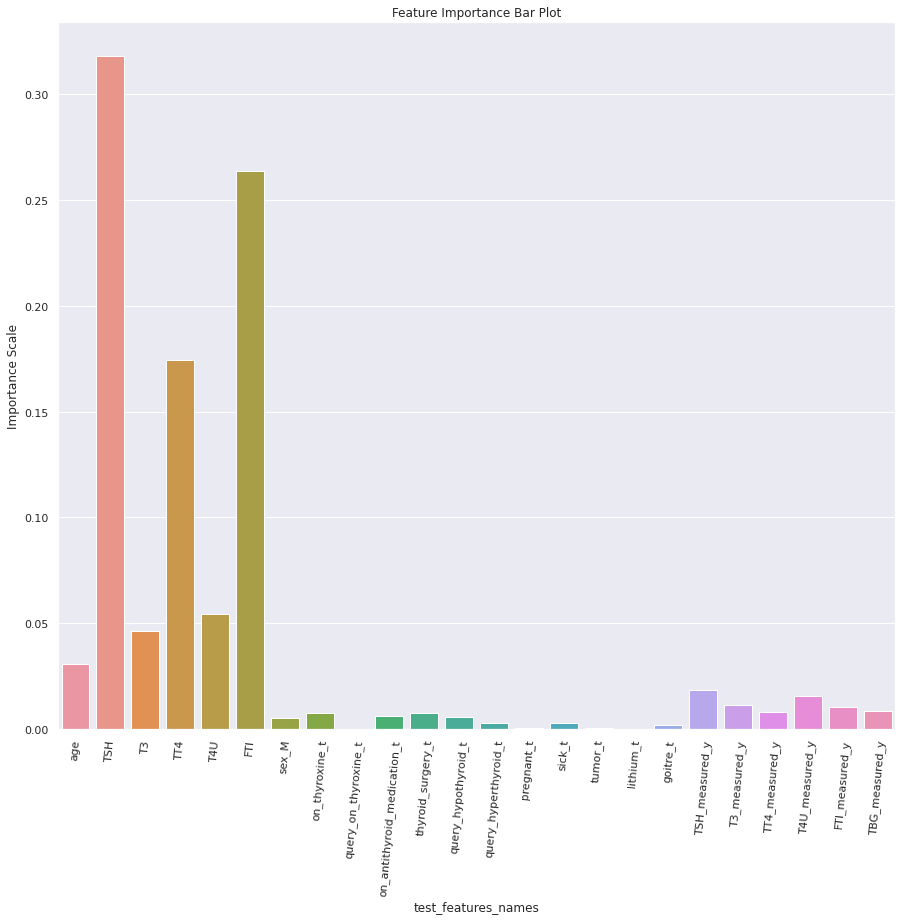

In [ ]:
plt.figure(figsize=(15,13))
sns.barplot(data=check_df, x="test_features_names", y="Importance")
plt.title('Feature Importance Bar Plot')
plt.xlabel('test_features_names')
plt.ylabel('Importance Scale')
plt.xticks(rotation=85)
plt.show()
#plt.savefig('important_features_1.png')

<BarContainer object of 24 artists>

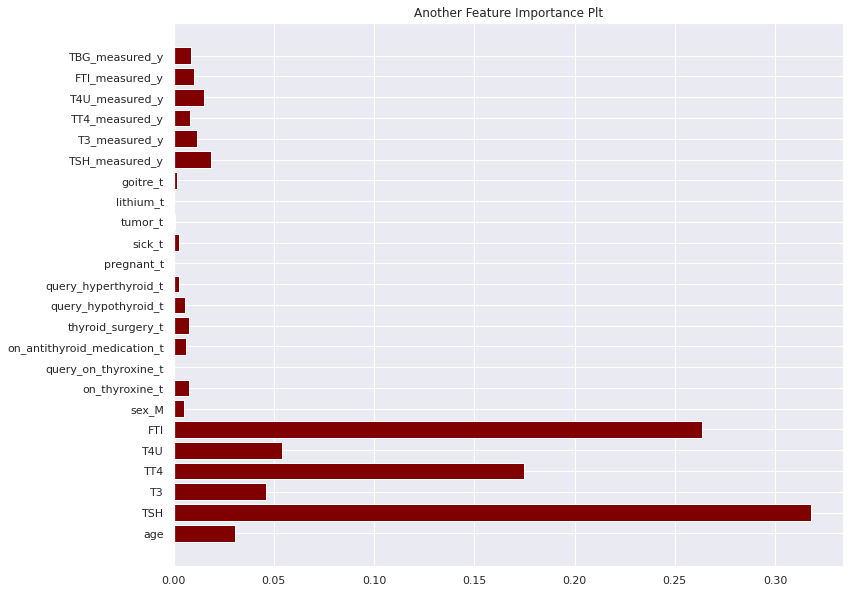

In [ ]:
names = list(check_df['test_features_names'])
values = list(check_df['Importance'])
  
fig = plt.figure(figsize=(12, 10))
plt.title("Another Feature Importance Plt")
# creating the bar plot
plt.barh(names, values, color='maroon')
#plt.savefig('important_features.png')

## Observations

* Our most important features are:
'age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_M',
 'goitre_t',
'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y'

# **Support Vector Machine**


In [ ]:
df_svm = df_dct.copy()

In [ ]:
df_svm.head()

,age,TSH,T3,TT4,T4U,FTI,status_negative,sex_M,on_thyroxine_t,query_on_thyroxine_t,on_antithyroid_medication_t,thyroid_surgery_t,query_hypothyroid_t,query_hyperthyroid_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t,TSH_measured_y,T3_measured_y,TT4_measured_y,T4U_measured_y,FTI_measured_y,TBG_measured_y
0,72,30.0,0.6,15.0,1.48,10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,15,145.0,1.7,19.0,1.13,17,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,24,0.0,0.2,4.0,1.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,24,430.0,0.4,6.0,1.04,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,77,7.3,1.2,57.0,1.28,44,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0


### Data Split


In [ ]:
# Check for missing values
perc_missing(df_svm)

,TOTAL MISSING,PERCANTAGE
FTI,0,0.0
FTI_measured_y,0,0.0
T3,0,0.0
T3_measured_y,0,0.0
T4U,0,0.0
T4U_measured_y,0,0.0
TBG_measured_y,0,0.0
TSH,0,0.0
TSH_measured_y,0,0.0
TT4,0,0.0


In [ ]:
test_features_best = [
'age',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'sex_M',
 'goitre_t',
'TSH_measured_y',
 'T3_measured_y',
 'TT4_measured_y',
 'T4U_measured_y',
 'FTI_measured_y',
 'TBG_measured_y'     
]

X_svm= df_dct[test_features_best].values

y_svm = df_dct['status_negative'].values 

print(X_svm.shape)
print(y_svm.shape)

# Split data into train and test data.
X_train_svm,X_test_svm,y_train_svm,y_test_svm = train_test_split(X_svm,y_svm,test_size=0.3)


(3007, 14)
(3007,)


In [ ]:
from sklearn.decomposition import FactorAnalysis
FA = FactorAnalysis(n_components = 3).fit_transform(df_dct[test_features_best].values)

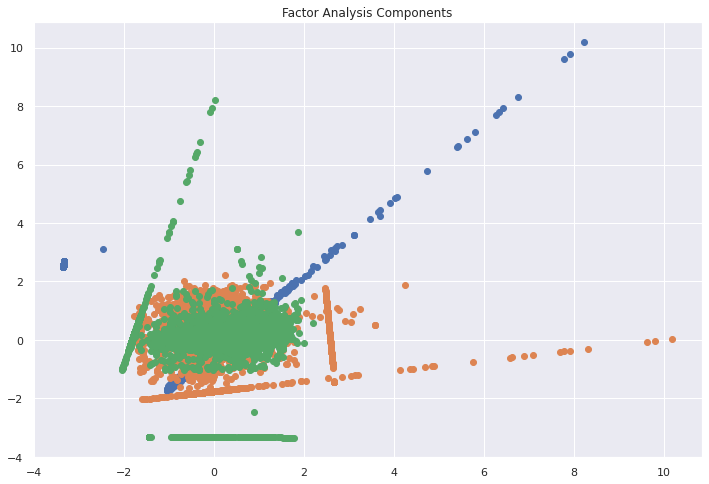

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.title('Factor Analysis Components')
plt.scatter(FA[:,0], FA[:,1])
plt.scatter(FA[:,1], FA[:,2])
plt.scatter(FA[:,2],FA[:,0])

#plt.savefig('features_scatter_plot.png')


## Test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import svm, datasets
from sklearn.svm import SVC

In [ ]:
def decision_boundary(X,y,model,res,test_idx=None):
    markers=['s','o','x']
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colormap=ListedColormap(colors[:len(np.unique(y))])
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
    z=model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz=z.reshape(xx.shape)
    plt.pcolormesh(xx,yy,zz,cmap=colormap)

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)


In [ ]:
model = SVC(C=10**10)
model.fit(X_train_svm,y_train_svm) # Hard SVM

#decision_boundary(np.vstack((X_train_svm,X_test_svm)),np.hstack((y_train_svm,y_test_svm)),model,0.08,test_idx=None)
plt.tight_layout()
plt.show()

## Normal SVC

In [ ]:
# instantiate classifier with default hyperparameters
svc = SVC() 


# fit classifier to training set
svc.fit(X_train_svm,y_train_svm)


# make predictions on test set
y_pred_svm = svc.predict(X_test_svm)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test_svm, y_pred_svm)))

Model accuracy score with default hyperparameters: 0.9779


## SVM with rbf kernel and C=1000.0

In [ ]:
# instantiate classifier with rbf kernel and C=1000
svc_rbf = SVC(C=1000.0) 

# fit classifier to training set
svc_rbf.fit(X_train_svm,y_train_svm)


# make predictions on test set
y_pred_svm = svc_rbf.predict(X_test_svm)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test_svm, y_pred_svm)))

Model accuracy score with default hyperparameters: 0.9823


## Run SVM with linear kernel

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc = SVC(kernel='linear', C=1.0) 

In [ ]:
# fit classifier to training set
linear_svc.fit(X_train_svm,y_train_svm)


# make predictions on test set
y_pred_svm = linear_svc.predict(X_test_svm)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test_svm, y_pred_svm)))

Model accuracy score with linear kernel and C=1.0 : 0.9812


## Run SVM with linear kernel and C=1000.0

In [ ]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train_svm,y_train_svm)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test_svm)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test_svm, y_pred_svm)))

Model accuracy score with linear kernel and C=1000.0 : 0.9812
